In [1]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 && pip install -r requirements.txt

In [5]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ahmed.LAPTOP-FHMUUAE2/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5 🚀 2022-8-9 Python-3.9.12 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [7]:
results = model(img)

In [10]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 685.5ms pre-process, 286.0ms inference, 37.8ms NMS per image at shape (1, 3, 384, 640)


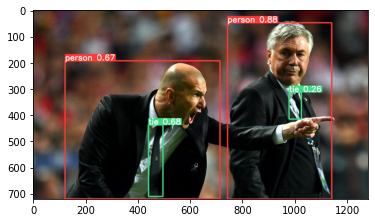

In [12]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
import cv2

In [15]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [20]:
import os
import uuid
import time

In [23]:
IMAGES_PATH = os.path.join('data', 'images')
label = 'no-glasses'

number_imgs = 20

In [24]:
cap = cv2.VideoCapture(0)

print('Collecting for {}'.format(label))

for img_num in range(number_imgs):
    print('Collecting for {}, image number {}'.format(label, img_num))
    
    ret, frame = cap.read()
    img_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
    
    cv2.imshow('Image', frame)
    
    cv2.imwrite(img_name, frame)
    
    time.sleep(2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### https://github.com/heartexlabs/labelImg

In [25]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [26]:
!pip install pyqt5 lxml --upgrade

In [28]:
!cd labelImg && C:\Users\ahmed.LAPTOP-FHMUUAE2\miniconda3\pkgs\pyqt-5.9.2-py37hd77b12b_6\Library\bin\pyrcc5 -o D:\Personal\ITI_\backlog\yolov5-iti\labelImg\libs\resources.py D:\Personal\ITI_\backlog\yolov5-iti\labelImg\resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 3 --data data/dataset.yaml --weights yolov5s.pt --workers 2

In [29]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ahmed.LAPTOP-FHMUUAE2/.cache\torch\hub\master.zip
YOLOv5 🚀 2022-8-9 Python-3.9.12 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [30]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [34]:
img = os.path.join('data', 'images', 'no-glasses.faa6bbef-17fc-11ed-a88b-70cd0dcb2662.jpg')

In [35]:
results = model(img)

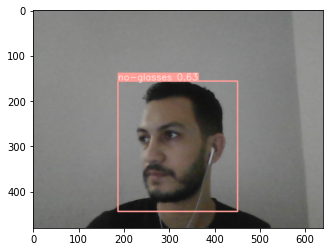

In [36]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [37]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()